## Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import lightgbm as lgb
from lightgbm import LGBMClassifier
import shap
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_validate

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
df = pd.read_csv('./data/final/03_family_dedornot_ra.csv')

In [4]:
df.head()

,Index,Patient=1,Corynebacteriaceae,Staphylococcaceae,Propionibacteriaceae,Neisseriaceae,Moraxellaceae,Lachnospiraceae,Family XI,Lactobacillaceae,...,Methylophilaceae,Parachlamydiaceae,Salinisphaeraceae,Sporichthyaceae,Gender F=1,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,P1,1,0.092816,0.001058,0.042075,0.0,0.006020,0.092352,0.0,0.000000,...,0.0,0.0,0.0,0.0,1,65,0,0,NaN,NaN
1,P2,1,0.698862,0.001191,0.004366,0.0,0.000000,0.012305,0.0,0.000000,...,0.0,0.0,0.0,0.0,1,67,0,0,31.25,17.0
2,P3,1,0.034017,0.259365,0.003640,0.0,0.000000,0.088352,0.0,0.013501,...,0.0,0.0,0.0,0.0,1,33,0,0,33.30,16.0
3,P4,1,0.029042,0.177362,0.015877,0.0,0.000000,0.127216,0.0,0.003109,...,0.0,0.0,0.0,0.0,1,66,0,0,93.75,21.0
4,P5,1,0.308125,0.164086,0.050351,0.0,0.004896,0.018195,0.0,0.000000,...,0.0,0.0,0.0,0.0,0,69,0,0,6.25,7.0


In [5]:
df.iloc[:,2:155]

,Corynebacteriaceae,Staphylococcaceae,Propionibacteriaceae,Neisseriaceae,Moraxellaceae,Lachnospiraceae,Family XI,Lactobacillaceae,Carnobacteriaceae,Micrococcaceae,...,Cellvibrionaceae,*Lariskella,Boechera gunnisoniana,Myrmecia israelensis,Acidimicrobiaceae,Nitrospiraceae,Methylophilaceae,Parachlamydiaceae,Salinisphaeraceae,Sporichthyaceae
0,0.092816,0.001058,0.042075,0.000000,0.006020,0.092352,0.000000,0.000000,0.053850,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.698862,0.001191,0.004366,0.000000,0.000000,0.012305,0.000000,0.000000,0.001985,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.034017,0.259365,0.003640,0.000000,0.000000,0.088352,0.000000,0.013501,0.004964,0.032363,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.029042,0.177362,0.015877,0.000000,0.000000,0.127216,0.000000,0.003109,0.053056,0.006946,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.308125,0.164086,0.050351,0.000000,0.004896,0.018195,0.000000,0.000000,0.118698,0.000265,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.058555,0.130277,0.522496,0.000595,0.056769,0.003176,0.006550,0.000000,0.009726,0.021900,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
87,0.457192,0.420537,0.010189,0.000000,0.004830,0.003573,0.028583,0.000000,0.008601,0.011711,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
88,0.158295,0.048375,0.097677,0.631328,0.002118,0.000000,0.002581,0.000000,0.000000,0.003176,...,0.0,0.0,0.0,0.0,0.000265,0.0,0.0,0.0,0.0,0.0
89,0.567941,0.358825,0.053255,0.000000,0.001522,0.000000,0.001985,0.000529,0.000000,0.002183,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [6]:
df.iloc[:,1]

0     1
1     1
2     1
3     1
4     1
     ..
86    0
87    0
88    0
89    0
90    0
Name: Patient=1, Length: 91, dtype: int64

In [7]:
X = df.iloc[:,2:155]
y = df.iloc[:,1]

## Cross validate with leave one out and explain according to average of estimators

### XGBoost

In [8]:
clfxgb = XGBClassifier(random_state=42)
scoring = ['accuracy', 'f1', 'precision', 'recall']
xgb_scores = cross_validate(clfxgb, X, y, cv=5, scoring=scoring, return_estimator=True)


In [9]:
print(f'Accuracy XGB: ', np.mean(xgb_scores['test_accuracy']))
print(f'F1 score XGB: ', np.mean(xgb_scores['test_f1']))
print(f'Precision XGB: ', np.mean(xgb_scores['test_precision']))
print(f'Recall XGB: ', np.mean(xgb_scores['test_recall']))

Accuracy XGB:  0.7362573099415204
F1 score XGB:  0.8199812517231873
Precision XGB:  0.7560927960927961
Recall XGB:  0.9


In [10]:
feature_importances_complete = []

for idx, estimator in enumerate(xgb_scores['estimator']):
    #print(f'The most important features for estimator {idx}:')
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    #print(feature_importances)
    feature_importances_complete.append(feature_importances)

feature_importances_complete = pd.concat(feature_importances_complete)

In [11]:
feature_importances_complete.shape

(765, 1)

In [12]:
fic = feature_importances_complete.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [13]:
fic[:15]

,Importance
Dermabacteraceae,0.092575
Lachnospiraceae,0.073364
Actinomycetaceae,0.062179
Corynebacteriaceae,0.060840
Rhodobacteraceae,0.055897
Comamonadaceae,0.049098
Moraxellaceae,0.047775
Propionibacteriaceae,0.041985
Staphylococcaceae,0.041735
Micrococcaceae,0.039587


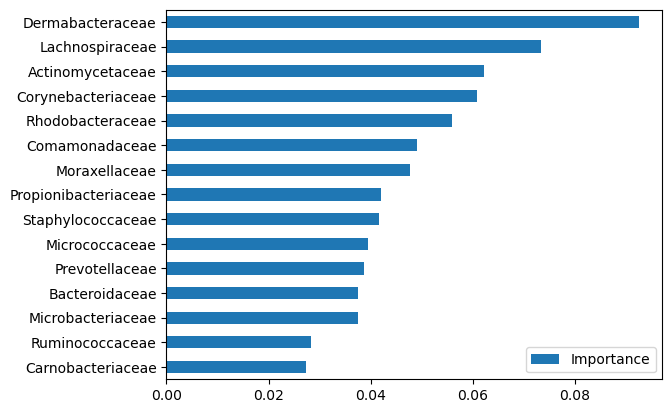

In [14]:
plot_fic = fic[:15]
plot_fic.plot(kind='barh').invert_yaxis()

In [15]:
for estimator in xgb_scores['estimator']:
    explainerxgb = shap.Explainer(estimator, X)
    shap_valuesxgb = explainerxgb.shap_values(X)

[10:00:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[10:00:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [16]:
np.shape(shap_valuesxgb)

(91, 153)

In [17]:
shap_valuesxgb_mean = np.mean(shap_valuesxgb, axis=0, keepdims=True)

In [18]:
np.shape(shap_valuesxgb_mean)

(1, 153)

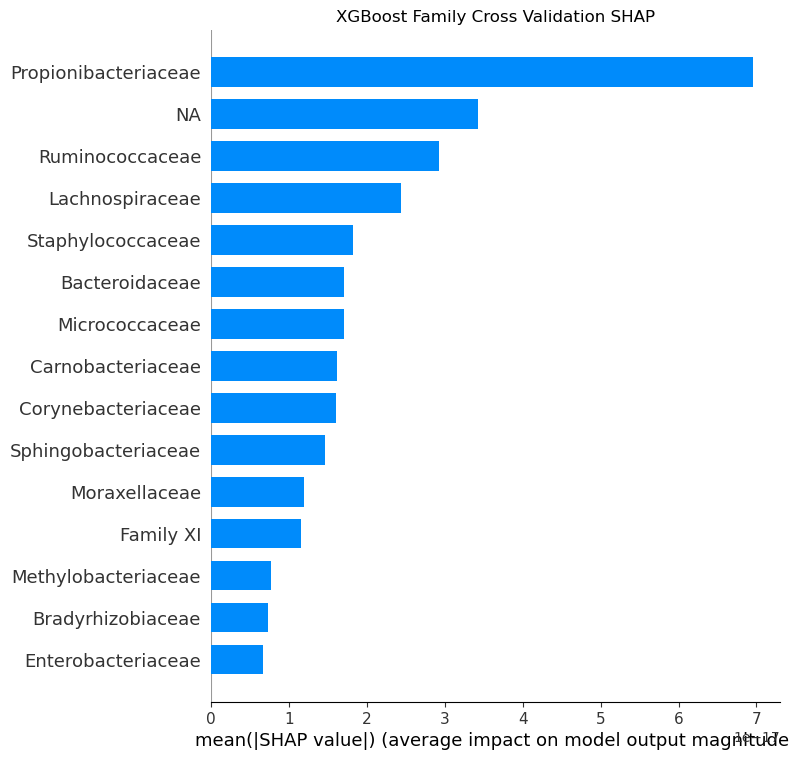

In [19]:
shap.summary_plot(shap_valuesxgb_mean, X, plot_type='bar', max_display=15, show=False)
plt.title('XGBoost Family Cross Validation SHAP')
plt.show()

### LightGBM

In [20]:
clflgbm = LGBMClassifier(random_state=42)
scoring = ['accuracy', 'f1', 'precision', 'recall']
lgbm_scores = cross_validate(clflgbm, X, y, cv=5, scoring=scoring, verbose=False, return_estimator=True)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 48, number of negative: 24
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666667 -> initscore=0.693147
[LightGBM] [Info] Start training from score 0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [21]:
print(f'Accuracy LGBM: ', np.mean(lgbm_scores['test_accuracy']))
print(f'F1 score LGBM: ', np.mean(lgbm_scores['test_f1']))
print(f'Precision LGBM: ', np.mean(lgbm_scores['test_precision']))
print(f'Recall LGBM: ', np.mean(lgbm_scores['test_recall']))

Accuracy LGBM:  0.6701754385964913
F1 score LGBM:  0.7696053511705685
Precision LGBM:  0.7317858611976259
Recall LGBM:  0.8179487179487179


In [22]:
feature_importances_complete_lgb = []

for idx, estimator in enumerate(lgbm_scores['estimator']):
    #print(f'The most important features for estimator {idx}:')
    feature_importances_lgb = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    #print(feature_importances_lgb)
    feature_importances_complete_lgb.append(feature_importances_lgb)

feature_importances_complete_lgb = pd.concat(feature_importances_complete_lgb)

In [23]:
fic_lgb = feature_importances_complete_lgb.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [24]:
fic_lgb[:15]

,Importance
Micrococcaceae,19.6
Lachnospiraceae,17.0
Sphingobacteriaceae,16.0
Staphylococcaceae,14.2
Enterobacteriaceae,13.8
Propionibacteriaceae,13.4
Ruminococcaceae,10.2
Oxalobacteraceae,10.2
NA,10.0
Flavobacteriaceae,10.0


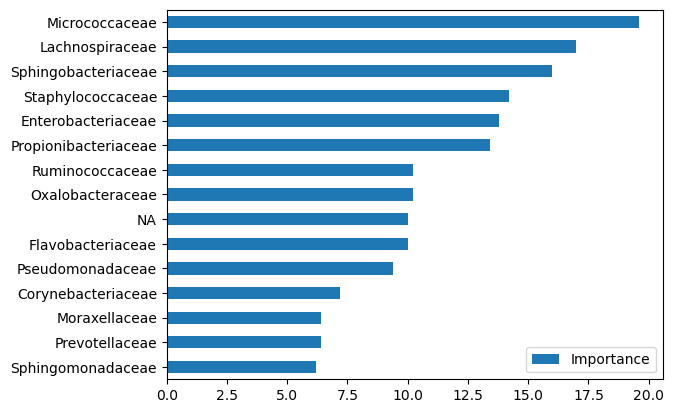

In [25]:
plot_fic_lgb = fic_lgb[:15]
plot_fic_lgb.plot(kind='barh').invert_yaxis()

In [26]:
for estimator in lgbm_scores['estimator']:
    explainerlgb = shap.Explainer(estimator, X)
    shap_valueslgb = explainerlgb.shap_values(X)    
    

In [27]:
np.shape(shap_valueslgb)

(91, 153)

In [28]:
shap_valueslgb_mean = np.mean(shap_valueslgb, axis=0, keepdims=True)

In [29]:
np.shape(shap_valueslgb_mean)

(1, 153)

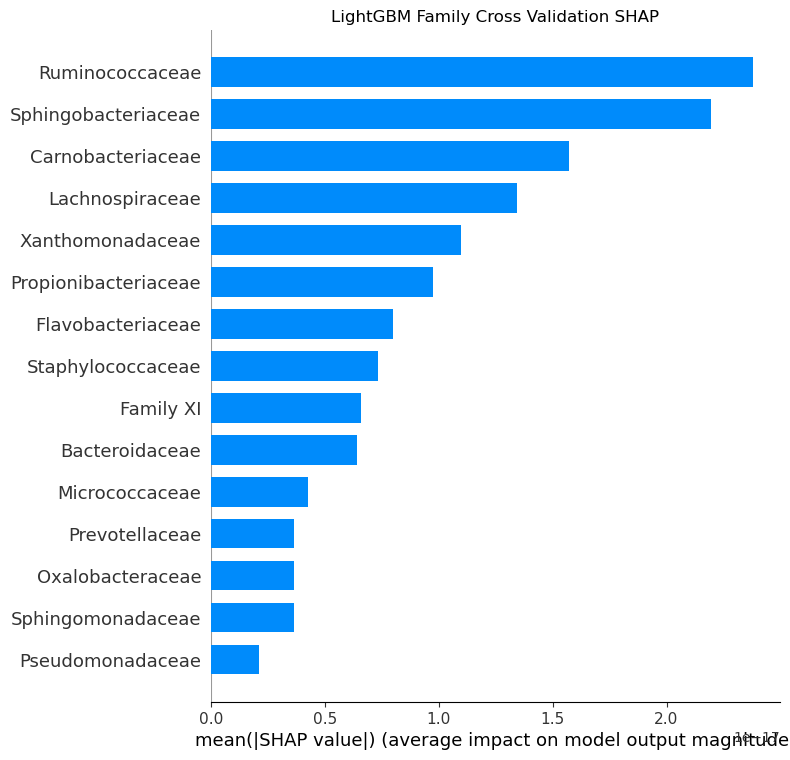

In [30]:
shap.summary_plot(shap_valueslgb_mean, X, plot_type='bar', max_display=15, show=False)
plt.title('LightGBM Family Cross Validation SHAP')
plt.show()

### Multilayer perceptron 

In [31]:
from sklearn.neural_network import MLPClassifier
clfmlp = MLPClassifier(solver="adam", activation="relu", learning_rate="constant", random_state=42, max_iter=30000, verbose=False)
clfmlp.out_activation_="softmax"

scoring = ['accuracy', 'f1', 'precision', 'recall']
mlp_scores = cross_validate(clfmlp, X, y, cv=5, scoring=scoring, return_estimator=True)

In [32]:
print(f'Accuracy MLP: ', np.mean(mlp_scores['test_accuracy']))
print(f'F1 score MLP: ', np.mean(mlp_scores['test_f1']))
print(f'Precision MLP: ', np.mean(mlp_scores['test_precision']))
print(f'Recall MLP: ', np.mean(mlp_scores['test_recall']))

Accuracy MLP:  0.6368421052631579
F1 score MLP:  0.7294645354645355
Precision MLP:  0.7122710622710622
Recall MLP:  0.7525641025641026


In [33]:
# Every estimator in mlp_scores need to be fitted and permutation importance run on each estimator.
MLP_feature_importances_complete = []

for idx, estimator in enumerate(mlp_scores['estimator']):
    mlpimportance = estimator.fit(X, y)
    result = permutation_importance(mlpimportance,X, y,n_repeats=20, random_state = 42)
    MLPfeatures = pd.DataFrame(mlpimportance.feature_names_in_,columns=['Features'])
    MLPfeatures['Importance'] = result.importances_mean.tolist()
    #Sort by importance
    MLPfeatures = MLPfeatures.sort_values(by = 'Importance',ascending=False)
    #print(f'The most important features for estimator {idx}:')
    #print(MLPfeatures)
    MLP_feature_importances_complete.append(MLPfeatures)

MLP_feature_importances_complete = pd.concat(MLP_feature_importances_complete)

In [34]:
MLPfeatures.shape

(153, 2)

In [35]:
MLP_feature_importances_complete.shape

(765, 2)

In [36]:
fic_mlp = MLP_feature_importances_complete.groupby('Features').mean().sort_values('Importance', ascending=False)

In [37]:
fic_mlp.shape

(153, 1)

In [38]:
fic_mlp[:15]

,Importance
Features,
Corynebacteriaceae,0.102198
Propionibacteriaceae,0.086813
Staphylococcaceae,0.082418
Lachnospiraceae,0.046703
Comamonadaceae,0.044505
Micrococcaceae,0.039011
Pseudomonadaceae,0.028022
Acetobacteraceae,0.026374
Chroococcidiopsis,0.018681


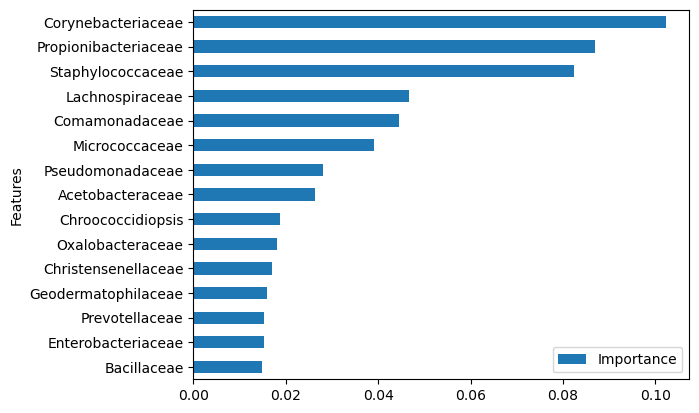

In [39]:
plot_fic_mlp = fic_mlp[:15]
plot_fic_mlp.plot(kind='barh').invert_yaxis()

In [40]:
for estimator in mlp_scores['estimator']:
    explainermlp = shap.Explainer(mlpimportance.predict, X)
    shap_valuesmlp = explainermlp.shap_values(X)

Permutation explainer: 92it [00:13,  2.29it/s]                        
Permutation explainer: 92it [00:10,  1.55s/it]                        
Permutation explainer: 92it [00:10,  1.37s/it]                        
Permutation explainer: 92it [00:10,  1.55s/it]                        
Permutation explainer: 92it [00:10,  1.79s/it]                        


In [41]:
np.shape(shap_valuesmlp)

(91, 153)

In [42]:
shap_valuesmlp_mean = np.mean(shap_valuesmlp, axis=0, keepdims=True)

In [43]:
np.shape(shap_valuesmlp_mean)

(1, 153)

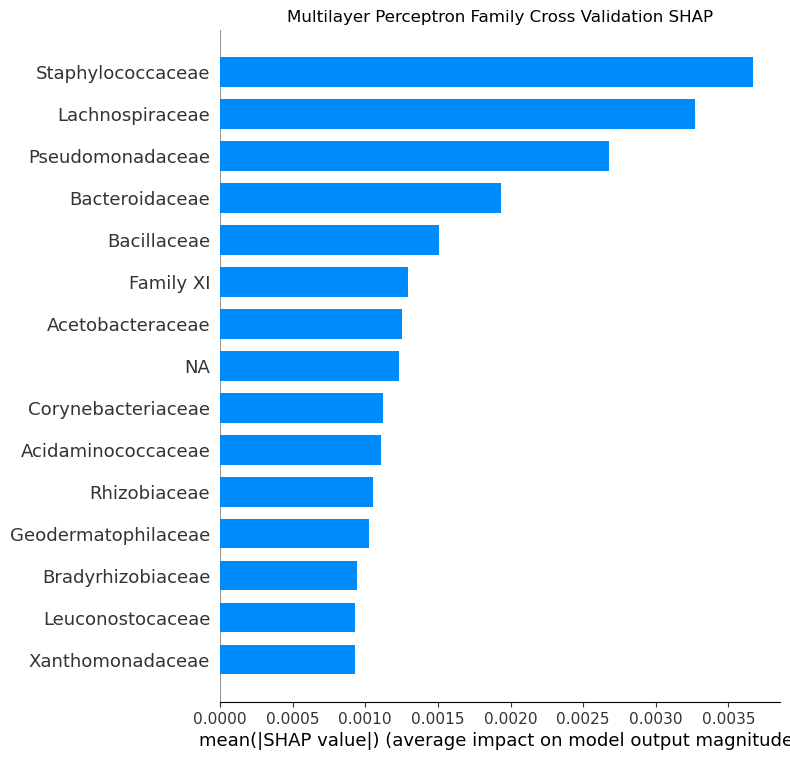

In [44]:
shap.summary_plot(shap_valuesmlp_mean, X, plot_type='bar', max_display=15, show=False)
plt.title('Multilayer Perceptron Family Cross Validation SHAP')
plt.show()